# «Математическая статистика»

![С НГ!](https://drive.google.com/uc?export=view&id=1sa6zoe4TanBm7PvnDT5uHueIAmmQ4Bts)

### Импорт модулей и библиотек

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import math
import statistics
import scipy
from scipy import stats

### № 1

В результате эксперимента получены статистические данные, представленные в виде статистического ряда.


###### Получу статистический ряд

![](https://drive.google.com/uc?export=view&id=18LFQCl5AYmw1R4mjEzP9CzBmQfiuTXq4)

In [2]:
row = [70, 95, 75, 85, 60, 77, 55, 63, 80, 67,
       90, 78, 57, 76, 84, 82, 75, 68, 73, 62, 
       62, 81, 77, 72, 97, 68, 85, 56, 92, 71,
       73, 78, 98, 63, 83, 85, 70, 90, 66, 91, 
       86, 68, 55, 93, 71, 96, 77, 81, 86, 72,
       82, 62, 70, 78, 67, 87, 91, 99, 78, 87, 
       91, 58, 81, 97, 75, 83, 71, 66, 61, 76,
       73, 85, 65, 90, 86, 61, 54, 75, 78, 93,
       87, 58, 72, 92, 66, 98, 65, 81, 76, 63,
       95, 83, 65, 57, 80, 87, 61, 92, 56, 71]
len(row)

100

###### Запишу значения результатов эксперимента в виде вариационного ряда;

*Дискретный вариационный ряд – это упорядоченное по возрастанию (как правило) множество значений величины X и соответствующих им частот либо относительных частот*

In [3]:
values = list(set(row)) #сортирую значения по возрастанию при помощи структуры данных "множество"
frequency = [row.count(el) for el in values] #нахожу частоту значений 
len(frequency) == len(values) # True
var_row = pd.DataFrame({'x':list(values), 'n':frequency})

relative_frequency = np.array(frequency)/len(row)
print(sum(relative_frequency))

#Добавлю относительную частоту в вариационный ряд
var_row['w'] = relative_frequency

print("Вариационный ряд: ") 
var_row 

1.0000000000000004
Вариационный ряд: 


,x,n,w
0,54,1,0.01
1,55,2,0.02
2,56,2,0.02
3,57,2,0.02
4,58,2,0.02
5,60,1,0.01
6,61,3,0.03
7,62,3,0.03
8,63,3,0.03
9,65,3,0.03


##### Найду размах варьирования и разобью ряд на 9 интервалов;

In [4]:
val_range = max(values) - min(values) #размах варьирования

# Воспользуюсь формулой Стерджесса 𝒌=[𝟏+𝐥𝐨𝐠𝟐𝒏]≈[𝟏+𝟑,𝟑𝟐𝟐∙𝒍𝒈𝒏], чтобы найти оптимальное количество интервалов
k = round(1+3.322*math.log(len(row)))
k == 9 #False, значит, количество не совпало, произведу разбиение по условию задачи
k = 9

h = int(val_range/k) # длина частичного интервала
points = np.linspace(min(values), max(values), num=k+1)
intervals = np.array([points[:-1], points[1:]]).transpose()
print(f'Размах = {val_range} \nДлина частичного интервала равна {h}\nИнтервалы:\n {intervals}')

Размах = 45 
Длина частичного интервала равна 5
Интервалы:
 [[54. 59.]
 [59. 64.]
 [64. 69.]
 [69. 74.]
 [74. 79.]
 [79. 84.]
 [84. 89.]
 [89. 94.]
 [94. 99.]]


In [5]:
# Найду середины интервалов, частоты интервалов, относительные частоты интервалов и плотности относительных частот
intervals_for_df = []
xi = []
ni = []
wi = []
count = 0
for i in intervals:
    intervals_for_df.append(f'{int(i[0])}-{int(i[1])}')
    s = 0
    xi.append((i[1]+i[0])/2)
    for value in values:
        if value in range(int(i[0]), int(i[1])+1):
            s+=row.count(value)
    ni.append(s)
    wi = np.array(ni)/len(row)
    wi_density = wi/k
var_row_i = pd.DataFrame({'Интервал':intervals_for_df, 'Середина интервала':xi, 'Частота':ni, 'Относительная частота':list(wi),
                          'Плотность отн.част.':wi_density})
var_row_i

,Интервал,Середина интервала,Частота,Относительная частота,Плотность отн.част.
0,54-59,56.5,9,0.09,0.010000
1,59-64,61.5,10,0.10,0.011111
2,64-69,66.5,11,0.11,0.012222
3,69-74,71.5,13,0.13,0.014444
4,74-79,76.5,15,0.15,0.016667
5,79-84,81.5,12,0.12,0.013333
6,84-89,86.5,12,0.12,0.013333
7,89-94,91.5,11,0.11,0.012222
8,94-99,96.5,8,0.08,0.008889


###### Построю полигон частот, гистограмму относительных частот и график эмпирической функции распределения;

Полигоном частот называют ломаную, отрезки которой соединяют точки (𝑥𝑖 ,𝑛𝑖). По оси абсцисс откладывают точки 𝑥𝑖 , а по оси ординат соответствующие значения 𝑛𝑖 (частоты). Точки (𝑥𝑖 ,𝑛𝑖) соединяют отрезками прямых.

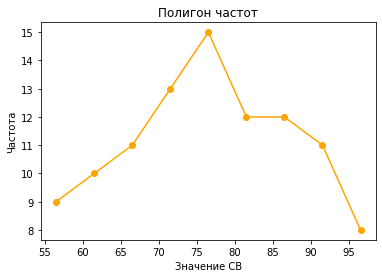

In [6]:
plt.plot(xi, ni, color='orange', marker='o') #строит полигон частот

plt.xlabel('Значение СВ')# добавляем название оси Ох
plt.ylabel('Частота')# добавляем название оси Оу
plt.title('Полигон частот')# добавляем название графику

plt.show()#отображает сюжет

Гистограмма относительных частот – это фигура, состоящая из прямоугольников, ширина которых равна длинам частичных интервалов, а высота – соответствующим плотностям относительных частот

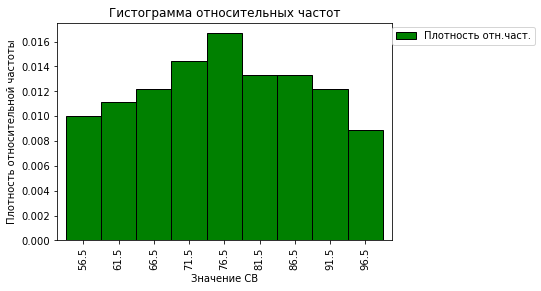

In [7]:
var_row_i.plot.bar(x='Середина интервала', y='Плотность отн.част.', color='g', edgecolor='black', width=1)

plt.title('Гистограмма относительных частот')
plt.xlabel('Значение СВ')
plt.ylabel('Плотность относительной частоты')
plt.legend(loc=(1, 0.9)) # перемещу легенду, чтобы не закрывала график

plt.show()

Эмпирической функцией распределения случайной величины (функцией распределения выборки) называют функцию 𝐹∗(𝑥) относительной частоты числа наблюдений: 𝐹*(𝑥)=    
>0, 𝑥≤𝑥1    
& 𝑛(𝑥)/𝑛, 𝑥1<𝑥≤𝑥(𝑛)    
& 1, 𝑥>𝑥(𝑛)    

*Вместо полоски фигурная скобка*

In [8]:
#Найду значения накопленных частот 
ac_friquency = [wi[0]]
i = 0
while i != len(wi)-1:
    ac_friquency.append(ac_friquency[i]+wi[i+1])
    i += 1

right_int = []
for i in intervals:
    right_int.append(i[1])

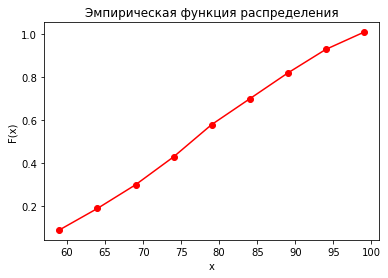

In [9]:
plt.plot(right_int, ac_friquency, color='r', marker='o') #строит полигон частот

plt.xlabel('x')# добавляем название оси Ох
plt.ylabel('F(x)')# добавляем название оси Оу
plt.title('Эмпирическая функция распределения')# добавляем название графику

plt.show()#отображает сюжет

###### Найду числовые характеристики выборки: выборочное среднее и выборочную дисперсию;

* Выборочной средней называется среднее арифметическое всех значений выборки
* Мода дискретного вариационного ряда – это варианта с максимальной частотой
* Медиана  вариационного ряда – это значение, которая делит его на две равные части (по количеству вариант)
* Выборочная дисперсия  – это среднее арифметическое квадратов отклонений всех вариант выборки от её средней

In [26]:
l = [82, 30, 98, 116, 80, 150, 200, 88, 70, 90, 150, 100, 86, 76, 90, 140, 76, 68]
len(l)
statistics.mean(l)
sum(l)

values = sorted(list(set(l))) #сортирую значения по возрастанию при помощи структуры данных "множество"
frequency = [l.count(el) for el in values] #нахожу частоту значений 
len(frequency) == len(values) # True
var_row = pd.DataFrame({'x':list(values), 'n':frequency})

relative_frequency = np.array(frequency)/len(l)
print(sum(relative_frequency))

print("Вариационный ряд: ") 
var_row 
statistics.stdev(l)

1.0000000000000002
Вариационный ряд: 


39.178658990085886

In [10]:
print(f'Числовые характеристики выборки:\n\
    Среднее арифметическое: {statistics.mean(row)}\n\
    Медиана: {statistics.median(row)}\n\
    Мода: {statistics.mode(row)}\n\
    Дисперсия: {statistics.variance(row)}\n\
    Стандартное отклонение: {statistics.stdev(row)}')

Числовые характеристики выборки:
    Среднее арифметическое: 76.4
    Медиана: 76.5
    Мода: 78
    Дисперсия: 146.52525252525254
    Стандартное отклонение: 12.104761564163606


###### Проверю некоторые гипотезы

![Пирсон](https://drive.google.com/uc?export=view&id=1k6AkIYl_ogDADILdR_L_E-seag5BU55Y)
Нулевая гипотеза H0: генеральная совокупность, из которой извлечена выборка, имеет нормальное распределение, проверю её, пользуясь критерием Пирсона при уровне значимости α=0,025;

Входные данные: 
* объем выборки (len(row))
* длина интервала (h)
* выборочное среднее (statistics.mean(xi))
* дисперсия (statistics.variance(xi))
* стандартное отклонение(statistics.stdev(xi))
![Пирсон](https://drive.google.com/uc?export=view&id=1Su1DI7eS9SmG3xNOEoEyMf2bN8A4oQkQ)


In [12]:
zi = []
fz_i = []
n_i_t = []

for x in xi:
    zi.append((x-statistics.mean(xi))/statistics.stdev(xi))
for z in zi:
    fz_i.append((1/math.sqrt(2.0*np.pi))*np.exp(-0.5*(z)**2))
for f in fz_i:
    n_i_t.append(((h*len(row)/statistics.stdev(xi))*f))
hyp_df = pd.DataFrame({'Интервал':intervals_for_df, 'x':xi, 'n':ni, 'z':zi, 'f(z)':fz_i, 'n_t':n_i_t})
hyp_df

,Интервал,x,n,z,f(z),n_t
0,54-59,56.5,9,-1.460593,0.137297,5.013396
1,59-64,61.5,10,-1.095445,0.218944,7.994711
2,64-69,66.5,11,-0.730297,0.305561,11.157517
3,69-74,71.5,13,-0.365148,0.373213,13.627823
4,74-79,76.5,15,0.000000,0.398942,14.567312
5,79-84,81.5,12,0.365148,0.373213,13.627823
6,84-89,86.5,12,0.730297,0.305561,11.157517
7,89-94,91.5,11,1.095445,0.218944,7.994711
8,94-99,96.5,8,1.460593,0.137297,5.013396


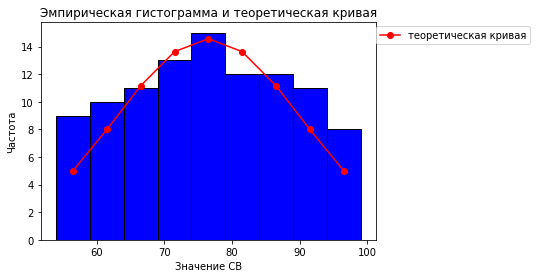

In [13]:
plt.bar(hyp_df['x'], hyp_df['n'], color='b', edgecolor='black', width=5)

plt.title('Эмпирическая гистограмма и теоретическая кривая')
plt.xlabel('Значение СВ')
plt.ylabel('Частота')

plt.plot(xi, n_i_t, 'r-', marker='o', label="теоретическая кривая")
plt.legend(loc=(1, 0.9)) # перемещу легенду, чтобы не закрывала график

plt.show()

![Кз](https://drive.google.com/uc?export=view&id=15brADJQHM_vXYy1lEi66cbBERFkfnHv_)

Критическое значение критерия согласия Пирсона составляет 14.4

Вычислю наблюдаемое значение критерия

In [14]:
max_pearson_value = 14.4
pearson_value = 0
for c in range(9):
    pearson_value += ((ni[c]-n_i_t[c])**2)/n_i_t[c]
print(f'Критическое значение критерия согласия Пирсона составляет {max_pearson_value} \n\
Наблюдаемое значение критерия согласия Пирсона составляет {pearson_value}')
if max_pearson_value > pearson_value:
    print('Принять гипотезу о нормальности')
else:
    print('Отклонить гипотезу о нормальности')

Критическое значение критерия согласия Пирсона составляет 14.4 
Наблюдаемое значение критерия согласия Пирсона составляет 6.884056270437589
Принять гипотезу о нормальности


**Значит, на уровне значимости 0.025 гипотезу  о нормальном распределении H0 принимаем**

Теперь воспользуюсь пакетом scipy, чтобы подтвердить верность своих вычислений

In [15]:
stat, p = scipy.stats.normaltest(xi)
print('Statistics=%.3f, p-value=%.3f' % (stat, p))
alpha = 0.025
if p > alpha:
    print('Принять гипотезу о нормальности')
else:
    print('Отклонить гипотезу о нормальности')

Statistics=1.861, p-value=0.394
Принять гипотезу о нормальности


D:\DS_IT\Anaconda\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


###### Найду доверительный интервал для математического ожидания при надежности p=0,9.

![Точность оценки](https://drive.google.com/uc?export=view&id=1jM2OoF97e4A2KXpPIcdw0Dk6tHNjbTLZ)
Коэффициент доверия отыскивается из соотношения, где Ф(х) - функция Лапласа![Коэф доверия](https://drive.google.com/uc?export=view&id=1njsTx2BJImAhUwh_Mn84RxXgP7YyetEH)

In [16]:
y = 0.9
# Ф(t) = 0.45
t = 1.65
accuracy = t*statistics.stdev(row)/(math.sqrt(len(row)))
print(f'Доверительный интервал для математического ожидания: ({statistics.mean(row)-accuracy};{statistics.mean(row)+accuracy})')

Доверительный интервал для математического ожидания: (74.40271434191301;78.397285658087)


###### Найду доверительный интервал для среднего квадратичного отклонения при надежности p=0,9.

Интервал для оценки среднего квадратичного отклонения:

![Инт_стд](https://drive.google.com/uc?export=view&id=11ZJLUrqPa3rI6wkHBGR-StM5ZcDWOcLX)

Так как наша выборка имеет объем 100 > 30, то можно воспользоваться приближенной формулой

![Инт_стд2](https://drive.google.com/uc?export=view&id=12OtMOY8-zLhkaTcyLiuCntwOiRLYM-3j)

In [17]:
print(f'Доверительный интервал для реднего квадратичного отклонения: \
({statistics.stdev(row)*(math.sqrt(2*len(row)))/(math.sqrt(2*len(row)-3)+t)};\
{statistics.stdev(row)*(math.sqrt(2*len(row)))/(math.sqrt(2*len(row)-3)-t)})')

Доверительный интервал для реднего квадратичного отклонения: (10.913604092778062;13.821391629265717)


### №2

В результате эксперимента получены статистические данные, представленные в виде корреляционной таблицы.


![Таблица2](https://drive.google.com/uc?export=view&id=1ZsdMZG-VsFR1PjNlqpiai2IQ5rA3qYLE)

##### Найду уравнение прямой регрессии y на x

In [85]:
x = np.array([250, 450, 650, 850, 1050, 1250]) #Признак фактор X и его категории
m_x = np.array([12, 16, 28, 20, 16, 8]) #Cуммы частот по строкам (по группам признака-фактора)
y = np.array([0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6]) #Признак фактор Y и его категории
m_y = np.array([3, 10, 7, 19, 27, 22, 9, 3]) #Cуммы частот по столбцам (по категориям признака-результата)
n = 100 #Объем совокупности
# В переменной matrix содержатся результаты группировки - совместные групповые частоты
matrix = np.array([[3, 4, 5, np.nan, np.nan, np.nan, np.nan, np.nan],
                   [np.nan, 6, 2, 8, np.nan, np.nan, np.nan, np.nan],
                   [np.nan, np.nan, np.nan, 5, 14, 9, np.nan, np.nan],
                   [np.nan, np.nan, np.nan, 6, 8, 6, np.nan, np.nan],
                   [np.nan, np.nan, np.nan, np.nan, 5, 7, 4, np.nan],
                   [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 5, 3]])
#Сумма всех групповых частот равна объёму статистической совокупности. Проверим.
np.sum(m_x)==np.sum(m_y) #True
np.nansum(matrix) == np.sum(m_x) #True

True

Частоты имеют тенденцию располагаться по диагонали от левого верхнего до правого нижнего угла, то между признаками существует прямая корреляционная зависимость («чем больше, тем больше»).

![Ур.регрессии](https://drive.google.com/uc?export=view&id=1oDCqczBBR3dPKaet5WH33A_LVRXHmS5R)

In [114]:
#Выборочные средние
x_mean = sum(m_x*x)/n
y_mean = sum(y*m_y)/n

# Для того, чтобы не запутаться, разобью формулу для выборочной дисперсии на части
a = 1/(n-1)
bx = np.sum(m_x*x*x)
by = np.sum(m_y*y*y)
c = 1/n
dx = np.sum(m_x*x)
dy = np.sum(m_y*y)

sx2 = a*(bx-(c*dx*dx))
sy2 = a*(by-(c*dy*dy))

#Корреляционный момент
e = np.nansum(y*((x*matrix.T).T))
sxy = a*(e-c*np.sum(m_x*x)*np.sum(m_y*y))

#Коэффициент корреляции

r = sxy/(math.sqrt(sx2)*math.sqrt(sy2))

На основе полученных характеристик найду уравнение эмпирической линии регрессии

In [116]:
#y = y_mean + r * (math.sqrt(sy2)/math.sqrt(sx2))*(x-x_mean)
first_step = r * (math.sqrt(sy2)/math.sqrt(sx2))
second_step = y_mean - first_step*x_mean
print(f'Уравнение эмпирической линии регрессии: y = {second_step} + {first_step}*x')

Уравнение эмпирической линии регрессии: y = 0.2702183153013902 + 0.0009387557959814539*x


##### Построю уравнение эмпирической линии регрессии и случайные точки выборки (X,Y)

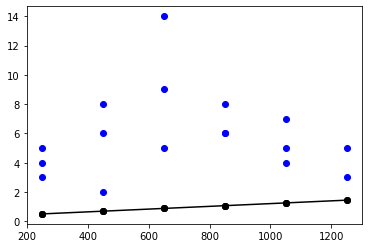

In [145]:
#Случайные точки выборки:
d_x = np.array([250, 250, 250, 450, 450, 450, 650, 650, 650, 850, 850, 850, 1050, 1050, 1050, 1250, 1250])
d_y = [3, 4, 5, 6, 2, 8, 9, 14, 5, 6, 8, 6, 5, 7, 4, 5, 3]

y = 0.2702183153013902 + 0.0009387557959814539*d_x #уравнение

plt.plot(d_x, y, marker='o', c='black')
plt.scatter(d_x, d_y, c='b')